In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Review**

Hi, my name is Dmitry and I will be reviewing your project.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  For your comments and questions.
</div>
  
First of all, thank you for turning in the project! You did a pretty good job overall, but there are some problems that need to be fixed before the project is accepted. Let me know if you have questions!

#General Introduction

In this project, the goal is to predict the recovery of gold during the various stages of a mining process, utilizing a dataset that captures the concentrations of different substances at different purification stages. The dataset is divided into a training set, containing information on process parameters and concentrations, and a test set for evaluation. The predictive modeling involves calculating the recovery values for both the rougher and final stages. The project follows a systematic approach, including data exploration, preprocessing, and feature engineering, to enhance the quality of the dataset. Multiple regression models are trained and evaluated, with an emphasis on selecting a robust model for accurate recovery predictions. The evaluation metric employed is the final sMAPE (symmetric Mean Absolute Percentage Error), offering a comprehensive assessment of the model's performance on both rougher and final recovery predictions. The chosen model is then applied to the test dataset for final evaluation and predictions.

In [ ]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# importing ml models to use
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import cross_val_score,KFold
from joblib import dump, load
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.dummy import DummyRegressor

In [ ]:
# To show all the columns present in dataframe
pd.set_option('display.max_columns', None)

In [ ]:
# Load the dataset
full=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CLIENTS/gulom1987/8th/gold_recovery_full.csv')
train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CLIENTS/gulom1987/8th/gold_recovery_train.csv')
test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CLIENTS/gulom1987/8th/gold_recovery_test.csv')

In [ ]:
#Exploring the data present in train dataframe
train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

In [ ]:
full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

In [ ]:
test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289,1250.493702,-399.746728,1199.398691,-397.50

In [ ]:
# complete dataset present
full.shape

(22716, 87)

In [ ]:
# Almost 75% of data is present in training set
train.shape

(16860, 87)

In [ ]:
# Almost 25% of data is present in test set
test.shape

(5856, 53)

<div class="alert alert-success">
<b>Reviewer's comment</b>

Alright, the data was loaded and inspected

</div>



---



---



# Prepare data

- The similar columns are present adjacent to each other

In [ ]:
# Fetch all the columns in the train dataframe
all_columns = train.columns

# Display the list of columns
display(all_columns)

Index(['date', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_clean

**To check if recovery is calculated correctly?**

In [ ]:
# 'C', 'F', and 'T' represent relevant columns for the recovery calculation
C = train['rougher.output.concentrate_au']
F = train['rougher.input.feed_au']
T = train['rougher.output.tail_au']

# Calculate recovery using the given formula
recovery_calculated = (C * (F - T)) / (F * (C - T)) * 100

# Extract actual values from the 'rougher.output.recovery' column
recovery_actual = train['rougher.output.recovery']

# Calculate Mean Absolute Error (MAE)
mae = abs(recovery_calculated - recovery_actual).mean()

# Display the MAE
print("Mean Absolute Error (MAE) between calculated and actual recovery:", mae)

Mean Absolute Error (MAE) between calculated and actual recovery: 9.303415616264301e-15


**Findings**


The Mean Absolute Error (MAE) between the calculated and actual recovery is approximately 9.303e-15.In a numerical context, this value is extremely close to zero, indicating that the calculated recovery values are almost identical to the actual recovery values.The small MAE value implies a high level of accuracy in the recovery calculations, and the formula seems to be a reliable means of estimating the recovery for the rougher stage in the gold recovery process.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Recovery data was validated successfully!

</div>

**What features are not available in the test set?**

In [ ]:
# Identify columns present in the training set but not in the test set
missing_columns = set(train.columns) - set(test.columns)

# Display the list of missing columns
print("Features not available in the test set:")
display(missing_columns)

# Inspect the data types of the missing columns
missing_columns_types = train[missing_columns].dtypes

# Display the data types of the missing columns
print("\nData types of the missing columns in test data set:")
display(missing_columns_types)

Features not available in the test set:


{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta


Data types of the missing columns in test data set:


secondary_cleaner.output.tail_au                      float64
rougher.calculation.floatbank11_sulfate_to_au_feed    float64
primary_cleaner.output.concentrate_sol                float64
final.output.tail_pb                                  float64
primary_cleaner.output.concentrate_pb                 float64
rougher.output.recovery                               float64
rougher.calculation.sulfate_to_au_concentrate         float64
rougher.output.tail_pb                                float64
primary_cleaner.output.tail_au                        float64
final.output.concentrate_sol                          float64
rougher.output.concentrate_sol                        float64
primary_cleaner.output.tail_ag                        float64
rougher.output.concentrate_pb                         float64
rougher.output.tail_sol                               float64
rougher.output.concentrate_au                         float64
rougher.output.tail_ag                                float64
primary_

**Findings**

All of the missing columns have a data type of float64, indicating that they are numerical features.

**Parameters types**
- Parameters related to tailings:
- Parameters related to concentrate and recovery:
- Calculation and ratio parameters:



<div class="alert alert-warning">
<b>Reviewer's comment</b>

The main point here is that these are all outputs of the process or calculations based on the outputs

</div>

# Data preprocessing

**To check data types of different columns present in different datasets**

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [ ]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

- All the columns have numerical data i.e float. only need to change is the date format as it is present in string form.

In [ ]:
# Convert the date column format from string to date format
train['date'] = pd.to_datetime(train['date'])
full['date'] = pd.to_datetime(full['date'])
test['date'] = pd.to_datetime(test['date'])

print(train['date'].dtype)
print(full['date'].dtype)
print(test['date'].dtype)

datetime64[ns]
datetime64[ns]
datetime64[ns]


**To check the missing values present in all dataframes**

In [ ]:
# To show all the rows in the dataframe or series
pd.set_option('display.max_rows', None)

In [ ]:
train.isna().sum()

date                                                     0
final.output.concentrate_ag                             72
final.output.concentrate_pb                             72
final.output.concentrate_sol                           370
final.output.concentrate_au                             71
final.output.recovery                                 1521
final.output.tail_ag                                    66
final.output.tail_pb                                   183
final.output.tail_sol                                  145
final.output.tail_au                                    66
primary_cleaner.input.sulfate                         1307
primary_cleaner.input.depressant                      1262
primary_cleaner.input.feed_size                          0
primary_cleaner.input.xanthate                         985
primary_cleaner.output.concentrate_ag                   82
primary_cleaner.output.concentrate_pb                  358
primary_cleaner.output.concentrate_sol                 6

In [ ]:
full.isnull().sum()

date                                                     0
final.output.concentrate_ag                             89
final.output.concentrate_pb                             87
final.output.concentrate_sol                           385
final.output.concentrate_au                             86
final.output.recovery                                 1963
final.output.tail_ag                                    83
final.output.tail_pb                                   200
final.output.tail_sol                                  271
final.output.tail_au                                    81
primary_cleaner.input.sulfate                         1609
primary_cleaner.input.depressant                      1546
primary_cleaner.input.feed_size                          0
primary_cleaner.input.xanthate                        1151
primary_cleaner.output.concentrate_ag                   98
primary_cleaner.output.concentrate_pb                  448
primary_cleaner.output.concentrate_sol                 7

In [ ]:
test.isnull().sum()

date                                            0
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.floatbank8_b_level       16
primary_cleaner.state.floatbank8_c_air         16
primary_cleaner.state.floatbank8_c_level       16
primary_cleaner.state.floatbank8_d_air         16
primary_cleaner.state.floatbank8_d_level       16
rougher.input.feed_ag                          16
rougher.input.feed_pb                          16
rougher.input.feed_rate                        40
rougher.input.feed_size                        22
rougher.input.feed_sol                         67
rougher.input.feed_au                          16
rougher.input.floatbank10_sulfate             257


- In almost every column the missing values are present so we need to impute them for the subsequent model training.
- But before that we have to drop the rows where there are  missing values present in either of the target columns to correctly evaluate our models. We performed this opeartion on both target and train dataframe.

In [ ]:
# Drop all the rows where our target columns have missing values in train dataframe
train.dropna(subset=['rougher.output.recovery', 'final.output.recovery'], inplace=True)

# Validate that we dont't have any missing values now in target columns in train dataframe
train[['final.output.recovery', 'rougher.output.recovery']].isna().sum()

final.output.recovery      0
rougher.output.recovery    0
dtype: int64

In [ ]:
# Drop all the rows where our target columns have missing values in full dataframe
full.dropna(subset=['rougher.output.recovery', 'final.output.recovery'], inplace=True)

# Validate that we dont't have any missing values now in target columns in full dataframe
full[['final.output.recovery', 'rougher.output.recovery']].isna().sum()

final.output.recovery      0
rougher.output.recovery    0
dtype: int64

In [ ]:
print(full.shape)
print(train.shape)

(19439, 87)
(14149, 87)


- Now only those rows are present in both dataframes where the targets columns donot have any missing values.

In [ ]:
# Loop through each column and impute missing values with the mean
for column in train.columns:
    train[column].fillna(train[column].mean(), inplace=True)

# Verify that there are no missing values after imputation
print("Number of Missing Values after Imputation:")
print(train.isnull().sum())

Number of Missing Values after Imputation:
date                                                  0
final.output.concentrate_ag                           0
final.output.concentrate_pb                           0
final.output.concentrate_sol                          0
final.output.concentrate_au                           0
final.output.recovery                                 0
final.output.tail_ag                                  0
final.output.tail_pb                                  0
final.output.tail_sol                                 0
final.output.tail_au                                  0
primary_cleaner.input.sulfate                         0
primary_cleaner.input.depressant                      0
primary_cleaner.input.feed_size                       0
primary_cleaner.input.xanthate                        0
primary_cleaner.output.concentrate_ag                 0
primary_cleaner.output.concentrate_pb                 0
primary_cleaner.output.concentrate_sol                0
prima

In [ ]:
# Loop through each column and impute missing values appropriately
for column in full.columns:
    if full[column].dtype == 'float64' or full[column].dtype == 'int64':
        # Impute missing values with the mean for numeric columns
        full[column].fillna(full[column].mean(), inplace=True)
    elif full[column].dtype == 'object':
        # Impute missing values with the most frequent value for categorical columns
        full[column].fillna(full[column].mode()[0], inplace=True)

# Verify that there are no missing values after imputation
print("Number of Missing Values after Imputation:")
print(full.isnull().sum())

Number of Missing Values after Imputation:
date                                                  0
final.output.concentrate_ag                           0
final.output.concentrate_pb                           0
final.output.concentrate_sol                          0
final.output.concentrate_au                           0
final.output.recovery                                 0
final.output.tail_ag                                  0
final.output.tail_pb                                  0
final.output.tail_sol                                 0
final.output.tail_au                                  0
primary_cleaner.input.sulfate                         0
primary_cleaner.input.depressant                      0
primary_cleaner.input.feed_size                       0
primary_cleaner.input.xanthate                        0
primary_cleaner.output.concentrate_ag                 0
primary_cleaner.output.concentrate_pb                 0
primary_cleaner.output.concentrate_sol                0
prima

In [ ]:
# Loop through each column and impute missing values with the mean
for column in test.columns:
    test[column].fillna(test[column].mean(), inplace=True)

# Verify that there are no missing values after imputation
print("Number of Missing Values after Imputation:")
print(test.isnull().sum())

Number of Missing Values after Imputation:
date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate            

- Now all the missing values are being imputed.

<div class="alert alert-danger">
<b>Reviewer's comment</b>

Please make sure that missing values in target columns are dropped before imputing missing values in columns used as features, otherwise it won't be possible to correctly evaluate the models

</div>

- **Correction is done ( for both train and full dataframe)**

**To check the duplicated values**

There are no duplicate values present in the any dataframe

In [ ]:
# Find and display duplicated rows in the train dataframe
duplicated_rows = train[train.duplicated()]
# Display the duplicated rows
print("Duplicated Rows in Train DataFrame:")
display(duplicated_rows)

Duplicated Rows in Train DataFrame:


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level


In [ ]:
# Find and display duplicated rows in the full dataframe
duplicated_rows = full[full.duplicated()]
# Display the duplicated rows
print("Duplicated Rows in full DataFrame:")
display(duplicated_rows)

Duplicated Rows in full DataFrame:


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level


In [ ]:
# Find and display duplicated rows in the test dataframe
duplicated_rows = test[test.duplicated()]
# Display the duplicated rows
print("Duplicated Rows in test DataFrame:")
display(duplicated_rows)

Duplicated Rows in test DataFrame:


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level





---


---



# Data analysis

**How the concentrations of metals change during the purification stage?**

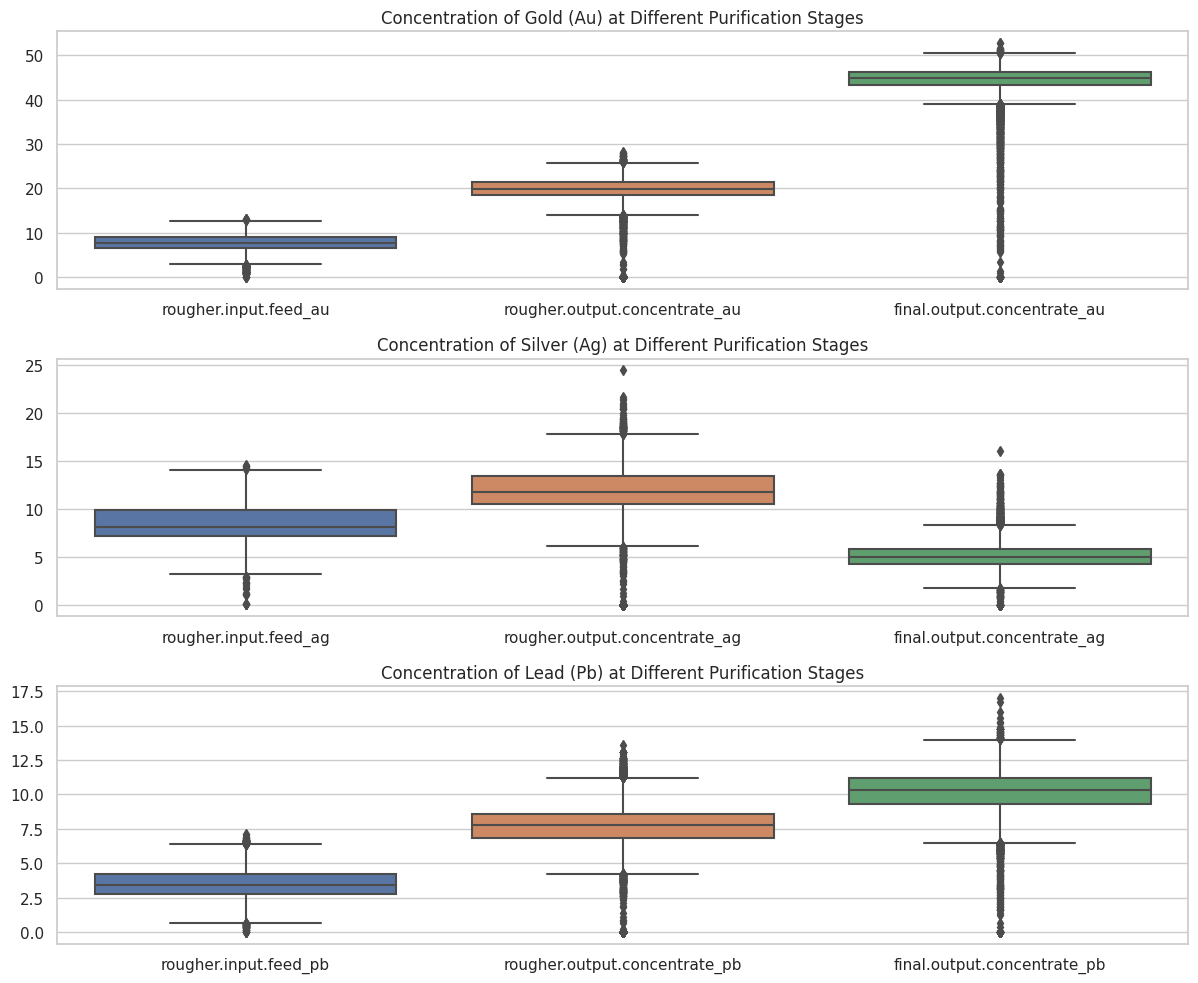

In [ ]:
# Extract relevant columns for each metal and purification stage
au_columns = ['rougher.input.feed_au', 'rougher.output.concentrate_au', 'final.output.concentrate_au']
ag_columns = ['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'final.output.concentrate_ag']
pb_columns = ['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'final.output.concentrate_pb']

# Concatenate the relevant columns for each metal
au_data = train[au_columns]
ag_data = train[ag_columns]
pb_data = train[pb_columns]

# Plot concentrations of metals at different purification stages
plt.figure(figsize=(12, 10))

# Gold (Au)
plt.subplot(3, 1, 1)
sns.boxplot(data=au_data)
plt.title('Concentration of Gold (Au) at Different Purification Stages')

# Silver (Ag)
plt.subplot(3, 1, 2)
sns.boxplot(data=ag_data)
plt.title('Concentration of Silver (Ag) at Different Purification Stages')

# Lead (Pb)
plt.subplot(3, 1, 3)
sns.boxplot(data=pb_data)
plt.title('Concentration of Lead (Pb) at Different Purification Stages')

plt.tight_layout()
plt.show()

**Findings**

- The gold concentration increases from the rougher stage to rougher output stage and increases furthur in the final output. Thats what is desired.
- The silver concentration increases from the rougher stage to rougher output stage and decreases eventually in the final output.
- The lead concentration increases from the rougher stage to rougher output stage and increases furthur in the final output.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Makes sense!

</div>

**Comparing the feed particle size distributions in the training set and in the test set**

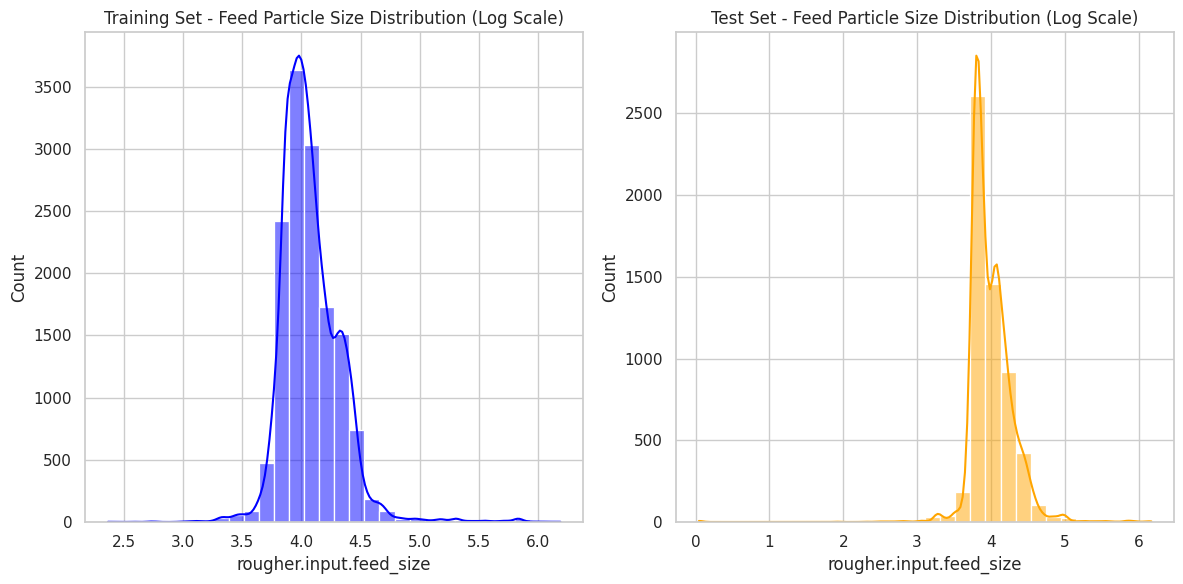

In [ ]:
# Set up subplots
plt.figure(figsize=(12, 6))

# Plot histogram for the training set with log scale
plt.subplot(1, 2, 1)
sns.histplot(np.log1p(train['rougher.input.feed_size']), bins=30, kde=True, color='blue')
plt.title('Training Set - Feed Particle Size Distribution (Log Scale)')

# Plot histogram for the test set with log scale
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(test['rougher.input.feed_size']), bins=30, kde=True, color='orange')
plt.title('Test Set - Feed Particle Size Distribution (Log Scale)')

plt.tight_layout()
plt.show()

**Findings**

- We used the log scale for proper visualization and it can be seen that the feed particle size distribution is comparitively same for both the training and test data set.
- As the distributions are not varying significantly, the model evaluation will be correct.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Feed size distributions were compared successfully

</div>

**Concentrations of given 3 substances at given 3 different stages**

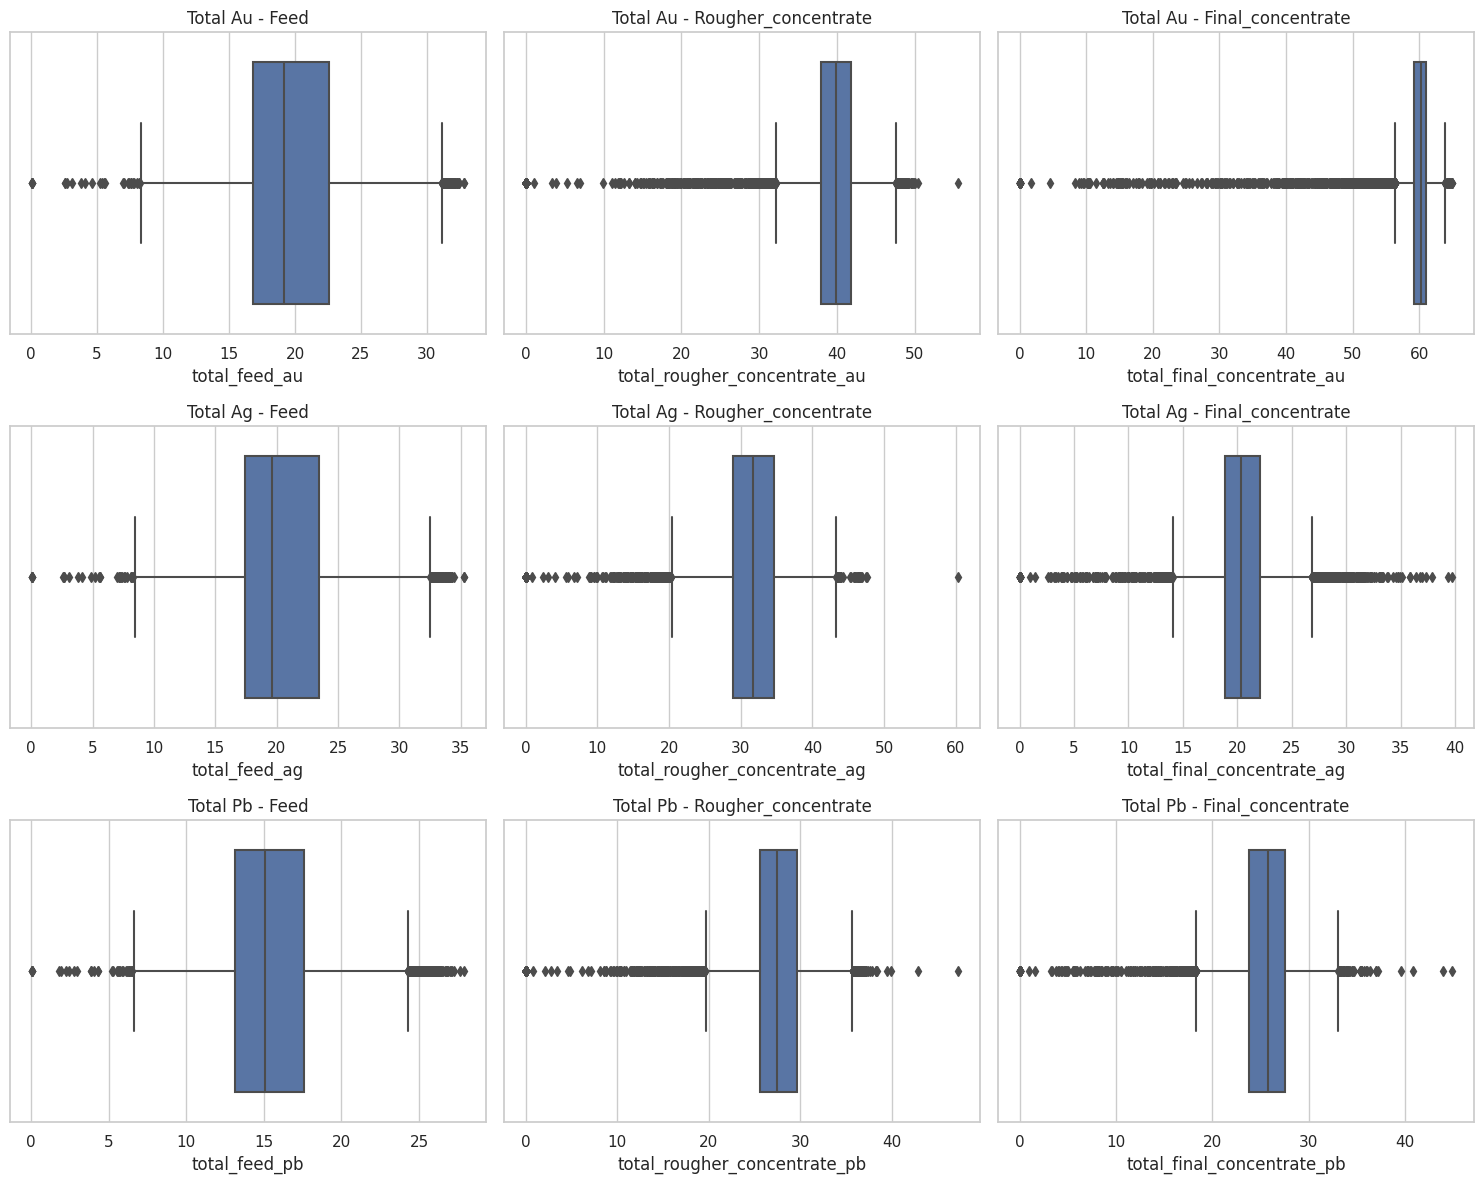

In [ ]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Columns related to concentrations
concentration_columns = [
    'rougher.input.feed_au',
    'rougher.input.feed_ag',
    'rougher.input.feed_pb',
    'rougher.output.concentrate_au',
    'rougher.output.concentrate_ag',
    'rougher.output.concentrate_pb',
    'final.output.concentrate_au',
    'final.output.concentrate_ag',
    'final.output.concentrate_pb'
]

# Calculate total concentrations for gold (Au), silver (Ag), and lead (Pb) at different stages
for element in ['au', 'ag', 'pb']:
    train[f'total_feed_{element}'] = train[[f'rougher.input.feed_{element}', f'rougher.input.feed_ag', f'rougher.input.feed_pb']].sum(axis=1)
    train[f'total_rougher_concentrate_{element}'] = train[[f'rougher.output.concentrate_{element}', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb']].sum(axis=1)
    train[f'total_final_concentrate_{element}'] = train[[f'final.output.concentrate_{element}', 'final.output.concentrate_ag', 'final.output.concentrate_pb']].sum(axis=1)

# Short code for visualization
import matplotlib.pyplot as plt

elements = ['au', 'ag', 'pb']
stages = ['feed', 'rougher_concentrate', 'final_concentrate']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

# Calculate total concentrations for gold (Au), silver (Ag), and lead (Pb) at different stages
for i, element in enumerate(['au', 'ag', 'pb']):
    for j, stage in enumerate(['feed', 'rougher_concentrate', 'final_concentrate']):
        column_name = f'total_{stage}_{element}'
        sns.boxplot(x=train[column_name], ax=axes[i, j])
        axes[i, j].set_title(f'Total {element.capitalize()} - {stage.capitalize()}')

# Adjust layout
plt.tight_layout()
plt.show()

**Findings**
- In almost every stage all 3 substances have very **narrow IQR** as compared to the overall **wide Range** means the data is distributed centrally but with the presense of outliers.
- It will be necessary to eliminate these outliers.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Alright!

</div>

**Removal of outllier using IQR method**

In [ ]:
# Function to remove outliers using IQR method
def remove_outliers(column):
    Q1 = train[column].quantile(0.25)
    Q3 = train[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return train[(train[column] >= lower_bound) & (train[column] <= upper_bound)]

**Justification for removing outliers**

By employing the IQR method to remove outliers, we enhance the integrity of our data analysis. This step is crucial because outliers have the potential to distort our understanding of concentration distributions in the raw feed, rougher concentrate, and final concentrate stages. With these extreme values removed, we achieve a more faithful representation of typical concentration levels, thereby strengthening the credibility of subsequent model training and evaluation processes.

**Visualization of distribution after appling IQR method**

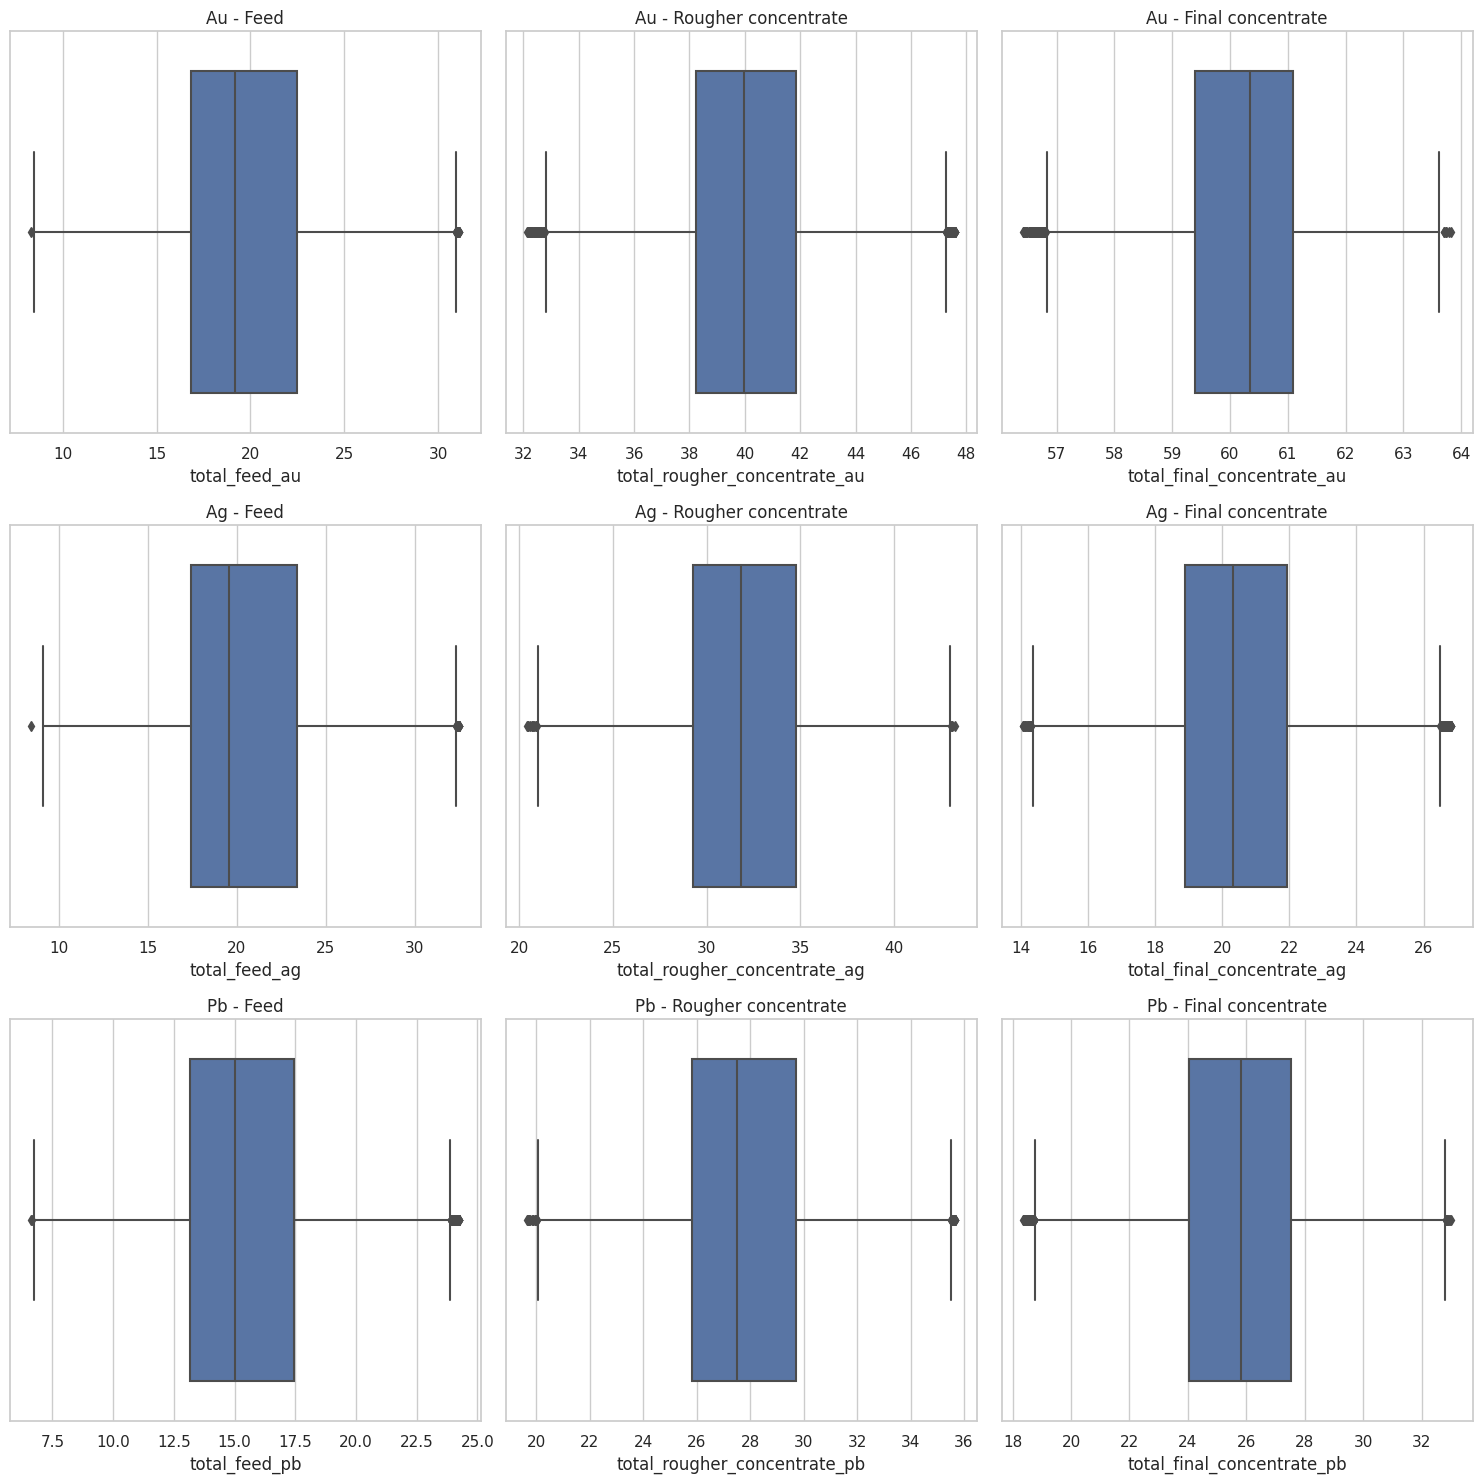

In [ ]:
# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Apply IQR method and plot boxplots
for i, element in enumerate(['au', 'ag', 'pb']):
    for j, stage in enumerate(['feed', 'rougher_concentrate', 'final_concentrate']):
        column_name = f'total_{stage}_{element}'
        filtered_data = remove_outliers(column_name)

        # Plot boxplot
        sns.boxplot(x=filtered_data[column_name], ax=axes[i, j])
        axes[i, j].set_title(f'{element.capitalize()} - {stage.replace("_", " ").capitalize()}')

# Adjust layout
plt.tight_layout()
plt.show()

**Findings**
- Now the extreme values are removed and the spread of the data is less as compared to the previous one.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Very good!

</div>



---



---



#Data preparation for model training

In [ ]:
print(train.shape)
print(full.shape)
print(test.shape)

(14149, 96)
(19439, 87)
(5856, 53)


**Common columns between train and test dataframes**

In [ ]:
# Get the common columns between train and test dataframes
common_columns = train.columns.intersection(test.columns)

# Add the target columns to the list of common columns
target_columns = ['rougher.output.recovery', 'final.output.recovery']
columns_to_keep = common_columns.union(target_columns)

# Keep only the specified columns in the train dataframe
train = train[columns_to_keep]

- It needs to be done to make train and test data align with eachother.

<div class="alert alert-success">
<b>Reviewer's comment</b>

The feature list was filtered to only include inputs

</div>

In [ ]:
print(train.shape)
print(test.shape)

(14149, 55)
(5856, 53)


## To get values of targets in the test set from the full dataset
Clearly, we have two targets - rougher.output.recovery and final.output.recovery. But, our test set  doesn't have either of them as they are output related columns. We'll need both the features for validation purposes.

We also know that we have full data and in that we have a common column - date in both the full data and test data. We can make use of it to merge the datasets to retrieve the values for the targets.

In [ ]:
# Merge full dataset with test set on date column
merged_test = pd.merge(test, full[['date', 'rougher.output.recovery', 'final.output.recovery']], on='date', how='left')

In [ ]:
test= merged_test

In [ ]:
test.shape

(5856, 55)

**Remove date column**

In [ ]:
# To remove date column
train.drop('date', axis=1, inplace=True)
test.drop('date', axis=1, inplace=True)

In [ ]:
# now the date column is removed
print(train.shape)
print(test.shape)

(14149, 54)
(5856, 54)


## Splitting data into features and target


In [ ]:
# Features (Input Variables)
df_train_features = train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)

# Target Variables
df_train_targets = train[['rougher.output.recovery', 'final.output.recovery']]

In [ ]:
# Features (Input Variables)
df_test_features = test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)

# Target Variables
df_test_targets = test[['rougher.output.recovery', 'final.output.recovery']]

In [ ]:
print(df_train_features.shape)
print(df_train_targets.shape)
print(df_test_features.shape)
print(df_test_targets.shape)

(14149, 52)
(14149, 2)
(5856, 52)
(5856, 2)


<div class="alert alert-success">
<b>Reviewer's comment</b>

Targets are correct

</div>

<div class="alert alert-danger">
<b>Reviewer's comment</b>

In this project the test set is already given. You can find the targets for the test set in the full dataset (the dates can be used for filtering/merging)

</div>

**Correction is done by merging dataframes(full and test) based on date column.**

## Scaling

In [ ]:
# train_features and merged_test_features have the same columns
common_columns = df_train_features.columns.intersection(df_test_features.columns)

# Create a scaler
scaler = StandardScaler()

# Fit the scaler on the common columns in training data
scaler.fit(df_train_features[common_columns])

# Transform the training data using the scaler
df_train_features = scaler.transform(df_train_features[common_columns])

# Transform the test data using the same scaler
df_test_features = scaler.transform(df_test_features[common_columns])

In [ ]:
for column in df_test_targets.columns:
    df_test_targets[column].fillna(df_test_targets[column].mean(), inplace=True)

In [ ]:
df_test_targets.isna().sum()

rougher.output.recovery    0
final.output.recovery      0
dtype: int64

<div class="alert alert-danger">
<b>Reviewer's comment</b>

The test set should be scaled using the scaler that was fit on the train set, otherwise you can end up with differently scaled train and test

</div>

**It is resolved now**

In [ ]:
print(df_train_features.shape)
print(df_test_features.shape)

(14149, 52)
(5856, 52)


<div class="alert alert-warning">
<b>Reviewer's comment</b>

For cross-validation it's better to apply scaling in each fold separately (e.g. using [pipelines](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html))

</div>



---



---



#Train different models

- We first defined the **sMAPE** and then **final sMAPE** based on rougher and final weightage.
- We defined a **sMAPE scorer** and find out the final sMAPE values for each
model.

In [ ]:
# Function to calculate smape evaluation metric
def calculate_smape(target: pd.Series, prediction: pd.Series) -> float:

    N = len(target)
    smape = ((abs(target-prediction) / ((abs(target) + abs(prediction)) / 2)).sum() / N) * 100

    return smape
# Function to final smape evaluation metric
def calculate_final_smape(smape_rougher: float, smape_final: float) -> float:

    final_smape = (0.25 * smape_rougher) + (0.75 * smape_final)
    return final_smape

smape_score = make_scorer(calculate_smape)

<div class="alert alert-success">
<b>Reviewer's comment</b>

The code for SMAPE calculation is correct

</div>

- NOw the individual ML models are developed for better understanding of of different algorithums performance.

##1. Linear Regression Model Training

In [ ]:
# Training Linear Regression Model on training data for rougher.output.recovery

# Instantiate a model
linear_regression_model = LinearRegression()

# Cross validate the current model using smape as scoring function
rougher_cross_validn_score = cross_val_score(linear_regression_model, df_train_features, df_train_targets['rougher.output.recovery'], cv=5, scoring=smape_score)
mean_rougher_cross_validn_score = rougher_cross_validn_score.mean()

# Print the metrics for rougher.output.recovery
print('Linear Regression Model on training set for rougher.output.recovery')
print('-'*100)
print(f'The best mean cross validation score using sMAPE on rougher.output.recovery is {mean_rougher_cross_validn_score}')

Linear Regression Model on training set for rougher.output.recovery
----------------------------------------------------------------------------------------------------
The best mean cross validation score using sMAPE on rougher.output.recovery is 12.516937816004454


In [ ]:
# Training Linear Regression Model on training data for final.output.recovery

# Instantiate a model
linear_regression_model = LinearRegression()

# Cross validate the current model using smape as scoring function
final_cross_validn_score = cross_val_score(linear_regression_model, df_train_features, df_train_targets['final.output.recovery'], cv=5, scoring=smape_score)
mean_final_cross_validn_score = final_cross_validn_score.mean()

# Print the metrics for final.output.recovery
print('Linear Regression Model on training set for final.output.recovery')
print('-'*100)
print(f'The best mean cross validation score using sMAPE on final.output.recovery is {mean_final_cross_validn_score}')

Linear Regression Model on training set for final.output.recovery
----------------------------------------------------------------------------------------------------
The best mean cross validation score using sMAPE on final.output.recovery is 12.730915591881367


##2. Decision Tree Regressor Model Training


In [ ]:
# Training Decision Tree Regressor Model on training set for rougher.output.recovery

best_decision_tree_regressor_model = None
max_depth = 0
best_rougher_cross_validn_score = -1000000

# Change max_depth hyperparameter from 1 to 10 & find at what depth the model is the most accurate
for depth in range(1, 11):
    # Instantiate a model with max_depth = depth
    current_decision_tree_regressor_model = DecisionTreeRegressor(max_depth=depth, random_state=98765)

    # Cross validate the current model using smape as scoring function
    rougher_cross_validn_score = cross_val_score(current_decision_tree_regressor_model, df_train_features, df_train_targets['rougher.output.recovery'], cv=5, scoring=smape_score)
    mean_rougher_cross_validn_score = rougher_cross_validn_score.mean()

    # Check for the best model until the current iteration
    if(best_rougher_cross_validn_score < mean_rougher_cross_validn_score):
        best_rougher_cross_validn_score = mean_rougher_cross_validn_score
        max_depth = depth
        best_decision_tree_regressor_model = current_decision_tree_regressor_model

# Print the metrics for rougher.output.recovery
print('Decision Tree Regressor Model on training set for rougher.output.recovery')
print('-'*100)
print(f'Maximum depth of the best Decision Tree Regressor Model is {max_depth}')
print(f'The best mean cross validation score using sMAPE on rougher.output.recovery is {best_rougher_cross_validn_score}')

Decision Tree Regressor Model on training set for rougher.output.recovery
----------------------------------------------------------------------------------------------------
Maximum depth of the best Decision Tree Regressor Model is 10
The best mean cross validation score using sMAPE on rougher.output.recovery is 15.696323549490907


In [ ]:
# Training Decision Tree Regressor Model on training set for final.output.recovery

best_decision_tree_regressor_model = None
max_depth = 0
best_final_cross_validn_score = -1000000

# Change max_depth hyperparameter from 1 to 10 & find at what depth the model is the most accurate
for depth in range(1, 11):
    # Instantiate a model with max_depth = depth
    current_decision_tree_regressor_model = DecisionTreeRegressor(max_depth=depth, random_state=98765)

    # Cross validate the current model using smape as scoring function
    final_cross_validn_score = cross_val_score(current_decision_tree_regressor_model, df_train_features, df_train_targets['final.output.recovery'], cv=5, scoring=smape_score)
    mean_final_cross_validn_score = final_cross_validn_score.mean()

    # Check for the best model until the current iteration
    if(best_final_cross_validn_score < mean_final_cross_validn_score):
        best_final_cross_validn_score = mean_final_cross_validn_score
        max_depth = depth
        best_decision_tree_regressor_model = current_decision_tree_regressor_model

# Print the metrics for rougher.output.recovery
print('Decision Tree Regressor Model on training set for final.output.recovery')
print('-'*100)
print(f'Maximum depth of the best Decision Tree Regressor Model is {max_depth}')
print(f'The best mean cross validation score using sMAPE on final.output.recovery is {best_final_cross_validn_score}')

Decision Tree Regressor Model on training set for final.output.recovery
----------------------------------------------------------------------------------------------------
Maximum depth of the best Decision Tree Regressor Model is 10
The best mean cross validation score using sMAPE on final.output.recovery is 17.404124248489712


##3. XGBRegressor Model Training

In [ ]:
# Training XGBRegressor Model on the training set for rougher.output.recovery

best_xgb_regressor_model = None
best_no_of_estimators = 0
max_depth = 0
best_rougher_cross_validn_score = -1000000

# Change n_estimators hyperparameter from 10 to 100 (increment by 10 steps)
# And find how many number of trees the ensemble should have for the model to be the most accurate
for no_of_estimators in range(10, 100, 10):
    for depth in range(1, 8):
        # Instantiate an XGBRegressor model with n_estimators = no_of_estimators and max_depth = depth
        current_xgb_regressor_model = XGBRegressor(n_estimators=no_of_estimators, max_depth=depth, random_state=98765)

        # Cross validate the current model using smape as a scoring function
        rougher_cross_validn_score = cross_val_score(current_xgb_regressor_model, df_train_features, df_train_targets['rougher.output.recovery'], cv=5, scoring=smape_score)
        mean_rougher_cross_validn_score = rougher_cross_validn_score.mean()

        # Check for the best model until the current iteration
        if best_rougher_cross_validn_score < mean_rougher_cross_validn_score:
            best_rougher_cross_validn_score = mean_rougher_cross_validn_score
            best_no_of_estimators = no_of_estimators
            max_depth = depth
            best_xgb_regressor_model = current_xgb_regressor_model

# Print the metrics for rougher.output.recovery
print('XGBRegressor Model on the training set for rougher.output.recovery')
print('-'*100)
print(f'Maximum depth of the best XGBRegressor Model is {max_depth}')
print(f'Maximum number of estimators in the best XGBRegressor Model is {best_no_of_estimators}')
print(f'The best mean cross-validation score using sMAPE on rougher.output.recovery is {best_rougher_cross_validn_score}')

XGBRegressor Model on the training set for rougher.output.recovery
----------------------------------------------------------------------------------------------------
Maximum depth of the best XGBRegressor Model is 6
Maximum number of estimators in the best XGBRegressor Model is 90
The best mean cross-validation score using sMAPE on rougher.output.recovery is 18.14954443901603


In [ ]:
# Training XGBRegressor Model on the training set for final.output.recovery

best_xgb_regressor_model_final = None
best_no_of_estimators_final = 0
max_depth_final = 0
best_final_cross_validn_score = -1000000

# Change n_estimators hyperparameter from 10 to 100 (increment by 10 steps)
# And find how many number of trees the ensemble should have for the model to be the most accurate
for no_of_estimators_final in range(10, 100, 10):
    for depth_final in range(1, 8):
        # Instantiate an XGBRegressor model with n_estimators = no_of_estimators and max_depth = depth
        current_xgb_regressor_model_final = XGBRegressor(n_estimators=no_of_estimators_final, max_depth=depth_final, random_state=98765)

        # Cross validate the current model using smape as a scoring function
        final_cross_validn_score = cross_val_score(current_xgb_regressor_model_final, df_train_features, df_train_targets['final.output.recovery'], cv=5, scoring=smape_score)
        mean_final_cross_validn_score = final_cross_validn_score.mean()

        # Check for the best model until the current iteration
        if best_final_cross_validn_score < mean_final_cross_validn_score:
            best_final_cross_validn_score = mean_final_cross_validn_score
            best_no_of_estimators_final = no_of_estimators_final
            max_depth_final = depth_final
            best_xgb_regressor_model_final = current_xgb_regressor_model_final

# Print the metrics for final.output.recovery
print('XGBRegressor Model on the training set for final.output.recovery')
print('-'*100)
print(f'Maximum depth of the best XGBRegressor Model is {max_depth_final}')
print(f'Maximum number of estimators in the best XGBRegressor Model is {best_no_of_estimators_final}')
print(f'The best mean cross-validation score using sMAPE on final.output.recovery is {best_final_cross_validn_score}')

XGBRegressor Model on the training set for final.output.recovery
----------------------------------------------------------------------------------------------------
Maximum depth of the best XGBRegressor Model is 6
Maximum number of estimators in the best XGBRegressor Model is 90
The best mean cross-validation score using sMAPE on final.output.recovery is 13.359117416440734


##4. KNN Regressor Model Training

In [ ]:
# Training KNN Regressor Model on the training set for rougher.output.recovery

best_knn_regressor_model = None
best_no_of_neighbors = 0
best_rougher_cross_validn_score = -1000000

# Change the number of neighbors from 1 to 20
# And find the optimal number of neighbors for the model to be the most accurate
for n_neighbors in range(1, 21):
    # Instantiate a KNN Regressor model with n_neighbors = n_neighbors
    current_knn_regressor_model = KNeighborsRegressor(n_neighbors=n_neighbors)

    # Cross validate the current model using smape as a scoring function
    rougher_cross_validn_score = cross_val_score(current_knn_regressor_model, df_train_features, df_train_targets['rougher.output.recovery'], cv=5, scoring=smape_score)
    mean_rougher_cross_validn_score = rougher_cross_validn_score.mean()

    # Check for the best model until the current iteration
    if best_rougher_cross_validn_score < mean_rougher_cross_validn_score:
        best_rougher_cross_validn_score = mean_rougher_cross_validn_score
        best_no_of_neighbors = n_neighbors
        best_knn_regressor_model = current_knn_regressor_model

# Print the metrics for rougher.output.recovery
print('KNN Regressor Model on the training set for rougher.output.recovery')
print('-'*100)
print(f'Optimal number of neighbors in the best KNN Regressor Model is {best_no_of_neighbors}')
print(f'The best mean cross-validation score using sMAPE on rougher.output.recovery is {best_rougher_cross_validn_score}')

KNN Regressor Model on the training set for rougher.output.recovery
----------------------------------------------------------------------------------------------------
Optimal number of neighbors in the best KNN Regressor Model is 1
The best mean cross-validation score using sMAPE on rougher.output.recovery is 14.120423334819543


In [ ]:
# Training KNeighborsRegressor Model on the training set for final.output.recovery

best_knn_regressor_model_final = None
best_no_of_neighbors_final = 0
best_final_cross_validn_score = -1000000

# Change the number of neighbors from 1 to 20
# And find the optimal number of neighbors for the model to be the most accurate
for n_neighbors_final in range(1, 21):
    # Instantiate a KNeighborsRegressor model with n_neighbors = n_neighbors
    current_knn_regressor_model_final = KNeighborsRegressor(n_neighbors=n_neighbors_final)

    # Cross validate the current model using smape as a scoring function
    final_cross_validn_score = cross_val_score(current_knn_regressor_model_final, df_train_features, df_train_targets['final.output.recovery'], cv=5, scoring=smape_score)
    mean_final_cross_validn_score = final_cross_validn_score.mean()

    # Check for the best model until the current iteration
    if best_final_cross_validn_score < mean_final_cross_validn_score:
        best_final_cross_validn_score = mean_final_cross_validn_score
        best_no_of_neighbors_final = n_neighbors_final
        best_knn_regressor_model_final = current_knn_regressor_model_final

# Print the metrics for final.output.recovery
print('KNeighborsRegressor Model on the training set for final.output.recovery')
print('-'*100)
print(f'Optimal number of neighbors in the best KNeighborsRegressor Model is {best_no_of_neighbors_final}')
print(f'The best mean cross-validation score using sMAPE on final.output.recovery is {best_final_cross_validn_score}')

KNeighborsRegressor Model on the training set for final.output.recovery
----------------------------------------------------------------------------------------------------
Optimal number of neighbors in the best KNeighborsRegressor Model is 1
The best mean cross-validation score using sMAPE on final.output.recovery is 13.819307095624357


<div class="alert alert-warning">
<b>Reviewer's comment</b>

Not sure what's the point of just training the models without evaluation :)

</div>

**Correction** Now the correction is done and cross validation is performed for all the individual ML models.

<div class="alert alert-danger">
<b>Reviewer's comment</b>

1. Please use `cross_val_score` or `cross_validate` instead of `cross_val_predict`: as noted  in `cross_val_predict` documentation `Passing these predictions into an evaluation metric may not be a valid way to measure generalization performance. Results can differ from cross_validate and cross_val_score unless all tests sets have equal size and the metric decomposes over samples.` And SMAPE does not decompose that way.
    
2. To use `make_scorer` with your `final_smape` function you need to make sure it has the correct signature: `def final_smape(y_true, y_pred)`
    
3. Please add some hyperparameter tuning using cross-validation for at least one model

</div>

- **Correctons**
- 1. Cross validation is performed.
- 2. make_scorer is updated now
- 3. Now the hyperparameters tuning is done as well for the ML models for better models performance.

# Final model evaluation

- Based on the training of different ML models the Linearregressor outperform the other ML models. We have selected it for the final model testing.

In [ ]:
# Instantiate the model
linear_regression_model_rougher = LinearRegression()

# Fit the model on training set
linear_regression_model_rougher.fit(df_train_features, df_train_targets['rougher.output.recovery'])

# Predict the target using the test set features
predictions_rougher = linear_regression_model_rougher.predict(df_test_features)

# Calculate & print the evaluation metrics
mae_rougher = mean_absolute_error(df_test_targets['rougher.output.recovery'], predictions_rougher)
rmse_rougher = np.sqrt(mean_squared_error(df_test_targets['rougher.output.recovery'],  predictions_rougher))
smape_rougher = calculate_smape(df_test_targets['rougher.output.recovery'],  predictions_rougher)

print('Evaluation Metrics for rougher.output.recovery')
print('MAE:', mae_rougher)
print('RMSE:', rmse_rougher)
print('sMAPE:', smape_rougher)

Evaluation Metrics for rougher.output.recovery
MAE: 6.878862087602007
RMSE: 13.209029433217951
sMAPE: 9.965888858395635


In [ ]:
# Instantiate the model with n_estimators = 1, depth = 40, random_state = 98765
linear_regression_model_final = LinearRegression()

# Fit the model on training set
linear_regression_model_final.fit(df_train_features, df_train_targets['final.output.recovery'])

# Predict the target using the test set features
predictions_final = linear_regression_model_final.predict(df_test_features)

# Calculate & print the evaluation metrics
mae_final = mean_absolute_error(df_test_targets['final.output.recovery'], predictions_final)
rmse_final = np.sqrt(mean_squared_error(df_test_targets['final.output.recovery'],  predictions_final))
smape_final = calculate_smape(df_test_targets['final.output.recovery'],  predictions_final)

print('Evaluation Metrics for final.output.recovery')
print('MAE:', mae_final)
print('RMSE:', rmse_final)
print('sMAPE:', smape_final)

Evaluation Metrics for final.output.recovery
MAE: 7.3916560369796995
RMSE: 11.368445298055972
sMAPE: 12.408727008403178


In [ ]:
# Calculate final sMAPE
final_smape = calculate_final_smape(smape_rougher, smape_final)
print('The final sMAPE metric is ', final_smape)

The final sMAPE metric is  11.798017470901293


#Compare the results with a Baseline model using DummyRegressor()

In [ ]:
# Instantiate the model
dummy_model_rougher = DummyRegressor()
dummy_model_final = DummyRegressor()

# Fit the model on training set
dummy_model_rougher.fit(df_train_features, df_train_targets['rougher.output.recovery'])
dummy_model_final.fit(df_train_features, df_train_targets['final.output.recovery'])

# Predict the target using the test set features
predictions_rougher = dummy_model_rougher.predict(df_test_features)
predictions_final = dummy_model_final.predict(df_test_features)

# Calculate & print the evaluation metrics
mae_rougher = mean_absolute_error(df_test_targets['rougher.output.recovery'], predictions_rougher)
rmse_rougher = np.sqrt(mean_squared_error(df_test_targets['rougher.output.recovery'],  predictions_rougher))
smape_rougher = calculate_smape(df_test_targets['rougher.output.recovery'],  predictions_rougher)

print('Evaluation Metrics for rougher.output.recovery')
print('MAE:', mae_rougher)
print('RMSE:', rmse_rougher)
print('sMAPE:', smape_rougher)

mae_final = mean_absolute_error(df_test_targets['final.output.recovery'], predictions_final)
rmse_final = np.sqrt(mean_squared_error(df_test_targets['final.output.recovery'],  predictions_final))
smape_final = calculate_smape(df_test_targets['final.output.recovery'],  predictions_final)

print('Evaluation Metrics for final.output.recovery')
print('MAE:', mae_final)
print('RMSE:', rmse_final)
print('sMAPE:', smape_final)

# Calculate final sMAPE
final_smape = calculate_final_smape(smape_rougher, smape_final)
print('The final sMAPE metric is ', final_smape)

Evaluation Metrics for rougher.output.recovery
MAE: 6.659414032659682
RMSE: 12.638233356643644
sMAPE: 9.640904081741748
Evaluation Metrics for final.output.recovery
MAE: 5.942403005541265
RMSE: 9.250006785237794
sMAPE: 9.547571893753103
The final sMAPE metric is  9.570904940750264


<div class="alert alert-success">
<b>Reviewer's comment</b>

The final model is evaluated on the test set

</div>

<div class="alert alert-danger">
<b>Reviewer's comment</b>

Please add a comparison with a simple constant baseline (e.g. using [DummyRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html))

</div>

- **Correction : It is added now**

# Conclusion

1. LinearRegressor demonstrated superior predictive performance with the lowest final sMAPE, surpassing other regression models on the train set. Thus select as final model.
2. Narrow Interquartile Ranges for gold, silver, and lead concentrations indicate consistent data distribution, albeit with occasional outliers, reflecting robust data patterns.
3. The log-scaled visualization of particle size distributions revealed minimal variation between training and test datasets, ensuring reliable model evaluation.
4. Concentration trends, including increasing gold and lead concentrations and decreasing silver concentration, align with desired outcomes during purification stages.
5. The small MAE value(9.303e-15) implies a high level of accuracy in the recovery calculations, and the formula seems to be a reliable means of estimating the recovery for the rougher stage in the gold recovery process.
6. The consistent increase in gold particle size distribution from rougher to the final output stage indicates positive concentration trends throughout the purification process.
7. The systematic project approach, from data exploration to evaluation, establishes a foundation for effective decision-making in mining processes.

<div class="alert alert-danger">
<b>Reviewer's comment</b>

> The negligible MAE of approximately 9.303e-15 affirms highly accurate recovery predictions, highlighting the model's precision.
    
Not sure what you mean here, there was no model at that point: indeed, targets can be accurately calculated from some outputs of the process, but we don't have access to these outputs before the process is finished.

</div>

**Correction**

- The mention of MAE was premature or unrelated to a model, as recovery calculations are based on specific process outcomes that become available only after the process concludes.
- Now the conclusion is updated for this specific point.